# PROJECT 

# LOAN APPROVAL AND RISK SCORE

# GROUP L

# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.optimizers import Adam


# Load and Read Dataset

In [2]:
df = pd.read_csv('Loan.csv')


In [3]:
df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [4]:
df.shape

(20000, 36)

# Name of Columns

In [5]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

# Find Null Values

In [6]:
df.isna()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [8]:
df.isna().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

# Convert Categorical To Numerical Column

In [10]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  


In [11]:
df.head(2)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,0,45,39948,617,0,4,22,13152,48,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,1,38,39709,628,0,0,15,26045,48,2,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0


# First Half Group

In [12]:
G1 = df.iloc[ : , :18]
G1.shape


(20000, 18)

# Second Half Group

In [13]:
G2 = df.iloc[ : ,18:37]
G2.shape


(20000, 18)

# First Half Group Correlation

In [14]:
correlation=G1.corr()
correlation


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory
ApplicationDate,1.000000,0.007367,-0.010590,-0.004712,-0.004990,0.005136,0.006645,-0.002649,0.001345,-0.011341,-0.009212,0.001896,0.004559,0.018195,-0.002219,-0.011092,-0.008219,0.007774
Age,0.007367,1.000000,0.144774,0.323243,0.003228,-0.003267,0.982980,-0.007492,-0.006992,-0.005489,-0.000287,-0.001731,0.015685,-0.001394,-0.001069,-0.002165,0.004438,0.010817
AnnualIncome,-0.010590,0.144774,1.000000,0.104045,0.013519,0.004814,0.145999,-0.004116,0.002972,-0.005613,-0.001244,0.011141,-0.001082,-0.007935,-0.008175,-0.005016,0.001507,0.003816
CreditScore,-0.004712,0.323243,0.104045,1.000000,0.018160,0.008083,0.327664,-0.010834,-0.000762,-0.000507,-0.014453,0.006607,0.011153,-0.009650,-0.008780,-0.001928,0.001913,0.008638
EmploymentStatus,-0.004990,0.003228,0.013519,0.018160,1.000000,0.005608,0.002799,0.009805,-0.000839,-0.004365,-0.003102,0.003668,0.001796,0.017346,0.013063,0.002139,0.003828,-0.000888
EducationLevel,0.005136,-0.003267,0.004814,0.008083,0.005608,1.000000,-0.004073,0.001342,-0.003007,0.003663,-0.007222,0.001842,-0.000136,0.006933,0.007108,0.005411,0.004030,0.001866
Experience,0.006645,0.982980,0.145999,0.327664,0.002799,-0.004073,1.000000,-0.007921,-0.007924,-0.004426,0.000136,-0.001631,0.018629,-0.001751,-0.002143,-0.002905,0.003139,0.009600
LoanAmount,-0.002649,-0.007492,-0.004116,-0.010834,0.009805,0.001342,-0.007921,1.000000,-0.000436,-0.000165,-0.007005,0.007807,0.021103,0.000806,0.000769,-0.006239,-0.009577,0.004844
LoanDuration,0.001345,-0.006992,0.002972,-0.000762,-0.000839,-0.003007,-0.007924,-0.000436,1.000000,0.003906,-0.001301,-0.011408,0.000068,-0.006160,0.001489,0.000978,0.001913,-0.000434
MaritalStatus,-0.011341,-0.005489,-0.005613,-0.000507,-0.004365,0.003663,-0.004426,-0.000165,0.003906,1.000000,0.000954,0.008265,0.009805,0.003838,0.013901,0.011994,0.013599,0.017035


# HeatMap

<Axes: >

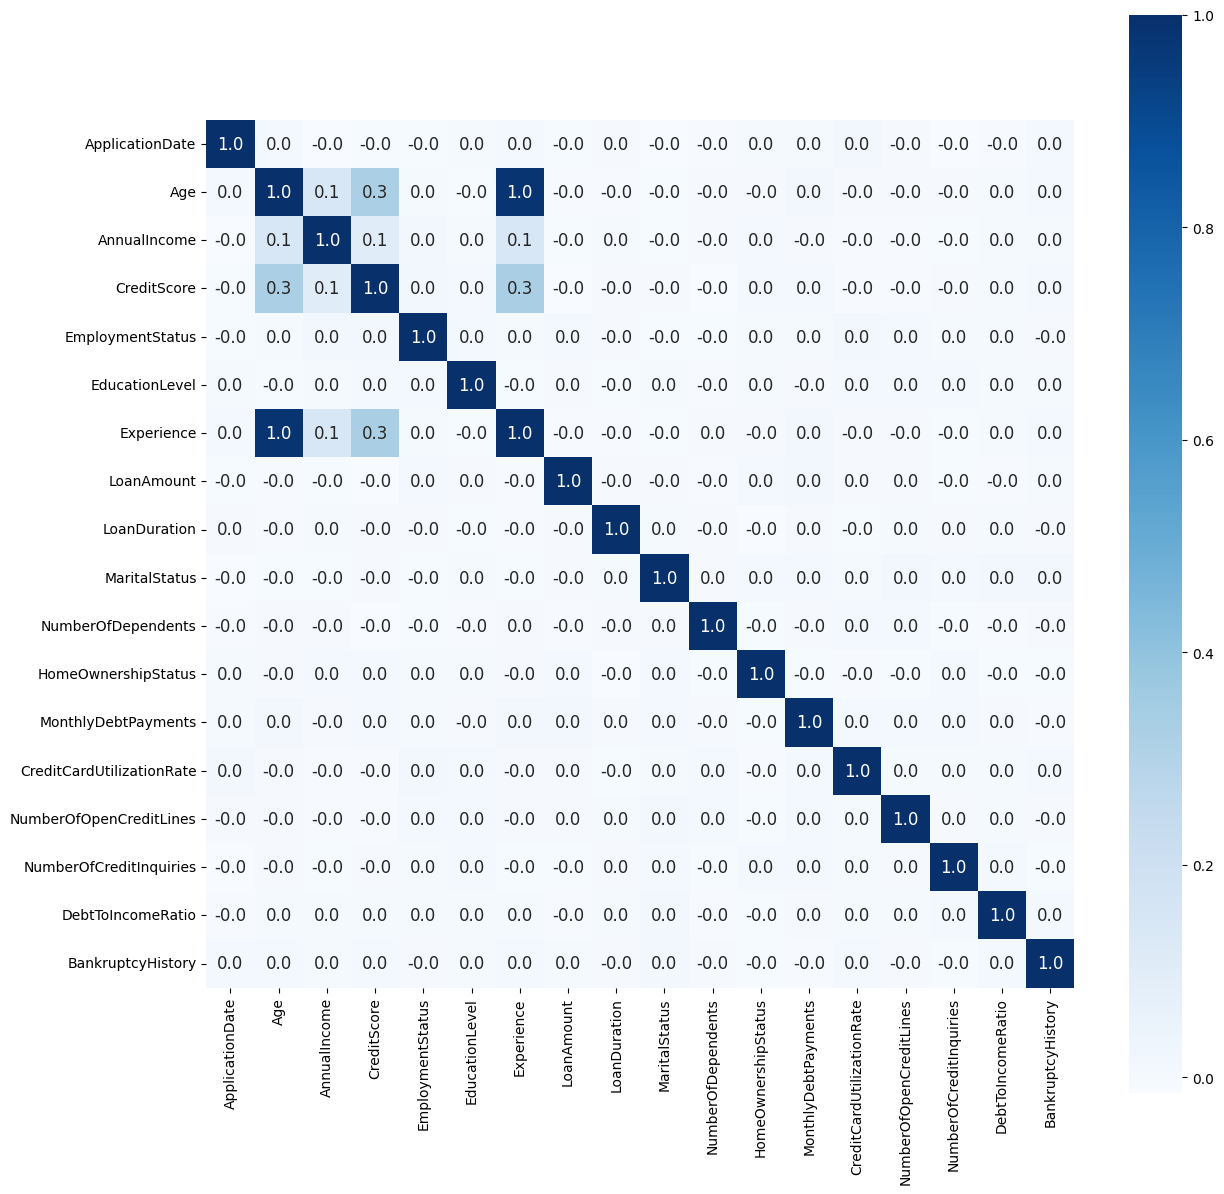

In [15]:
correlation=G1.corr()
correlation

plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':12}, cmap='Blues')


In [16]:
df.shape

(20000, 36)

# Second Half Group Correlation

In [17]:
correlation=G2.corr()
correlation


,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
LoanPurpose,1.000000,-0.001272,0.011489,-0.003223,0.004335,0.002350,0.000172,-0.004297,-0.006935,-0.008587,0.000465,0.002334,0.003249,0.000820,0.004452,0.001540,-0.007062,0.005521
PreviousLoanDefaults,-0.001272,1.000000,0.002079,0.005503,0.002616,0.006008,0.006939,-0.003732,0.004639,-0.011716,0.003628,0.008605,0.013689,0.008299,-0.011763,-0.000458,-0.065343,0.258659
PaymentHistory,0.011489,0.002079,1.000000,0.001090,-0.004736,-0.017384,-0.007135,-0.011324,0.003335,0.010530,-0.007882,-0.002853,-0.002999,0.002030,-0.000883,0.003420,0.030804,-0.016992
LengthOfCreditHistory,-0.003223,0.005503,0.001090,1.000000,-0.011103,-0.002911,0.004588,0.000318,-0.005526,0.006534,0.015104,0.004313,0.004399,0.004991,-0.010042,-0.009381,0.105949,-0.177796
SavingsAccountBalance,0.004335,0.002616,-0.004736,-0.011103,1.000000,-0.000392,0.006705,-0.002128,-0.001572,-0.008145,-0.004250,0.003458,0.006012,0.002731,0.000212,-0.003484,0.000961,0.002190
CheckingAccountBalance,0.002350,0.006008,-0.017384,-0.002911,-0.000392,1.000000,0.003322,0.001473,0.009233,-0.005696,-0.002440,0.001596,-0.003554,-0.001943,0.002281,-0.006630,0.000660,-0.004044
TotalAssets,0.000172,0.006939,-0.007135,0.004588,0.006705,0.003322,1.000000,-0.000276,-0.004128,-0.000479,0.007057,0.978997,-0.007368,-0.005807,-0.000875,-0.007333,0.184011,-0.297117
TotalLiabilities,-0.004297,-0.003732,-0.011324,0.000318,-0.002128,0.001473,-0.000276,1.000000,-0.001761,-0.006187,-0.003399,-0.129962,0.007140,0.010176,-0.001668,-0.002427,-0.029434,0.055617
MonthlyIncome,-0.006935,0.004639,0.003335,-0.005526,-0.001572,0.009233,-0.004128,-0.001761,1.000000,-0.010641,-0.001422,-0.003284,-0.075522,-0.064565,-0.005905,-0.538314,0.604101,-0.487039
UtilityBillsPaymentHistory,-0.008587,-0.011716,0.010530,0.006534,-0.008145,-0.005696,-0.000479,-0.006187,-0.010641,1.000000,-0.007986,-0.000968,-0.005517,-0.004051,-0.007481,0.006942,0.003303,-0.005196


# HeatMap

<Axes: >

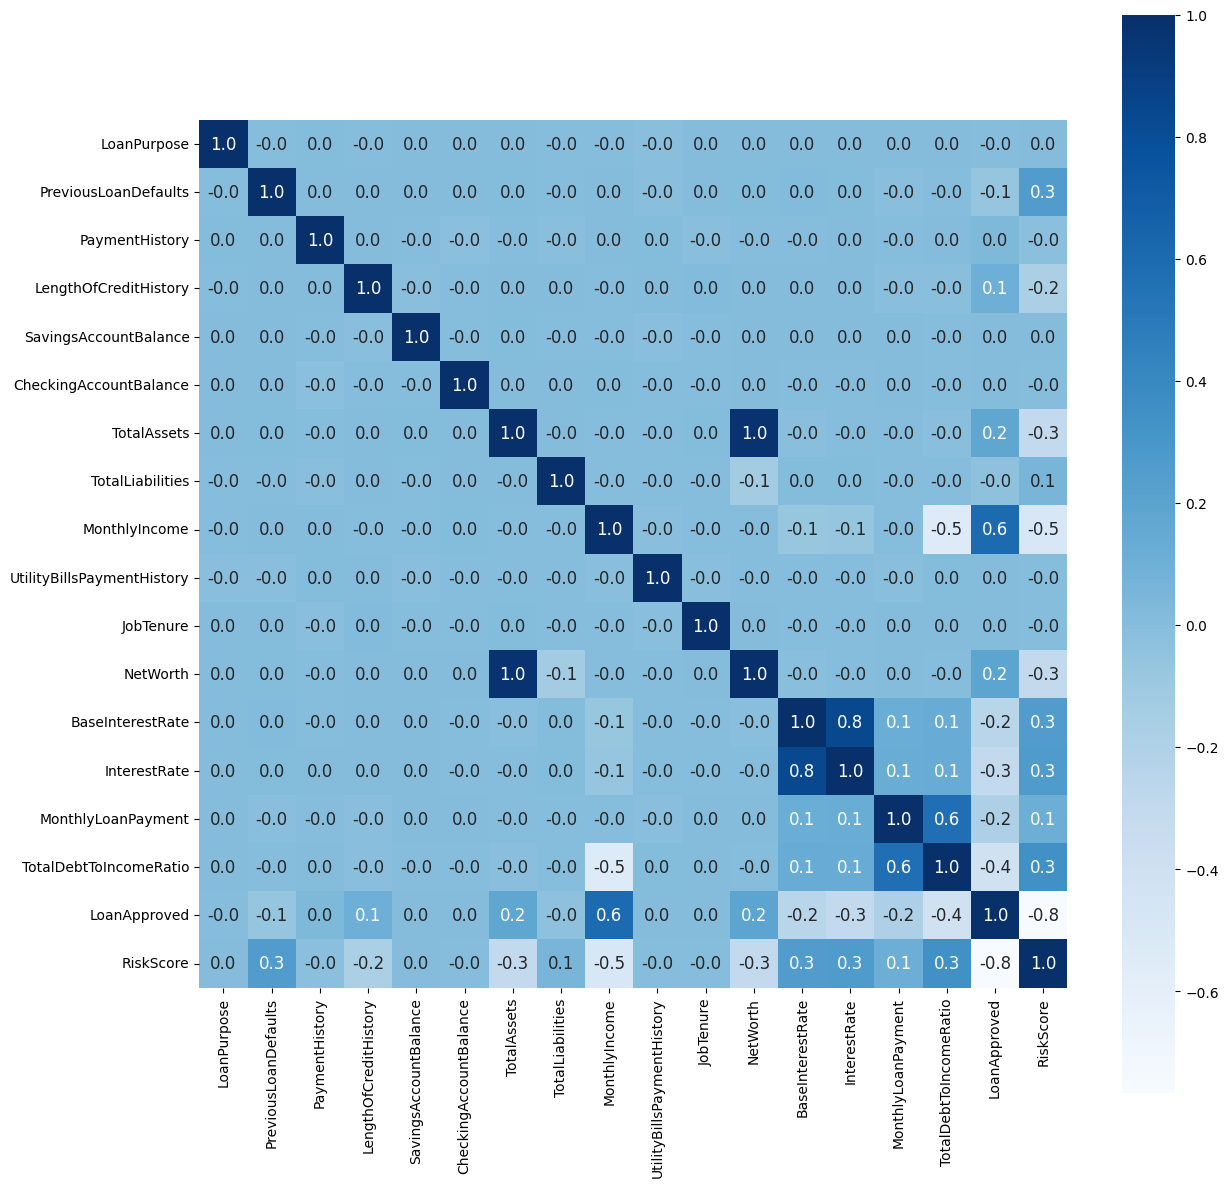

In [18]:
correlation=G2.corr()
correlation
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':12}, cmap='Blues')


In [19]:
df.shape

(20000, 36)

# Combine Groups

In [20]:
df=pd.concat([G1,G2], axis=1,ignore_index=False )

In [21]:
df.shape

(20000, 36)

# Correlation

In [22]:
correlation = df.corr()
correlation

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,1.000000,0.007367,-0.010590,-0.004712,-0.004990,0.005136,0.006645,-0.002649,0.001345,-0.011341,...,-0.010630,0.006943,-0.007983,-0.001883,0.003161,0.001148,-0.005480,-0.001799,-0.005704,0.007974
Age,0.007367,1.000000,0.144774,0.323243,0.003228,-0.003267,0.982980,-0.007492,-0.006992,-0.005489,...,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,-0.010590,0.144774,1.000000,0.104045,0.013519,0.004814,0.145999,-0.004116,0.002972,-0.005613,...,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,-0.004712,0.323243,0.104045,1.000000,0.018160,0.008083,0.327664,-0.010834,-0.000762,-0.000507,...,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
EmploymentStatus,-0.004990,0.003228,0.013519,0.018160,1.000000,0.005608,0.002799,0.009805,-0.000839,-0.004365,...,0.014262,0.000793,0.004600,-0.013421,-0.009818,-0.008926,0.006687,-0.009122,-0.020411,0.132964
EducationLevel,0.005136,-0.003267,0.004814,0.008083,0.005608,1.000000,-0.004073,0.001342,-0.003007,0.003663,...,0.003943,0.002437,0.004036,0.011414,-0.007037,-0.002536,0.001473,0.002635,0.019650,-0.017034
Experience,0.006645,0.982980,0.145999,0.327664,0.002799,-0.004073,1.000000,-0.007921,-0.007924,-0.004426,...,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.002649,-0.007492,-0.004116,-0.010834,0.009805,0.001342,-0.007921,1.000000,-0.000436,-0.000165,...,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,0.001345,-0.006992,0.002972,-0.000762,-0.000839,-0.003007,-0.007924,-0.000436,1.000000,0.003906,...,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
MaritalStatus,-0.011341,-0.005489,-0.005613,-0.000507,-0.004365,0.003663,-0.004426,-0.000165,0.003906,1.000000,...,-0.006169,0.000731,0.006668,-0.001683,0.002563,0.003604,0.002944,0.009498,-0.006828,0.016824


# HeatMap

<Axes: >

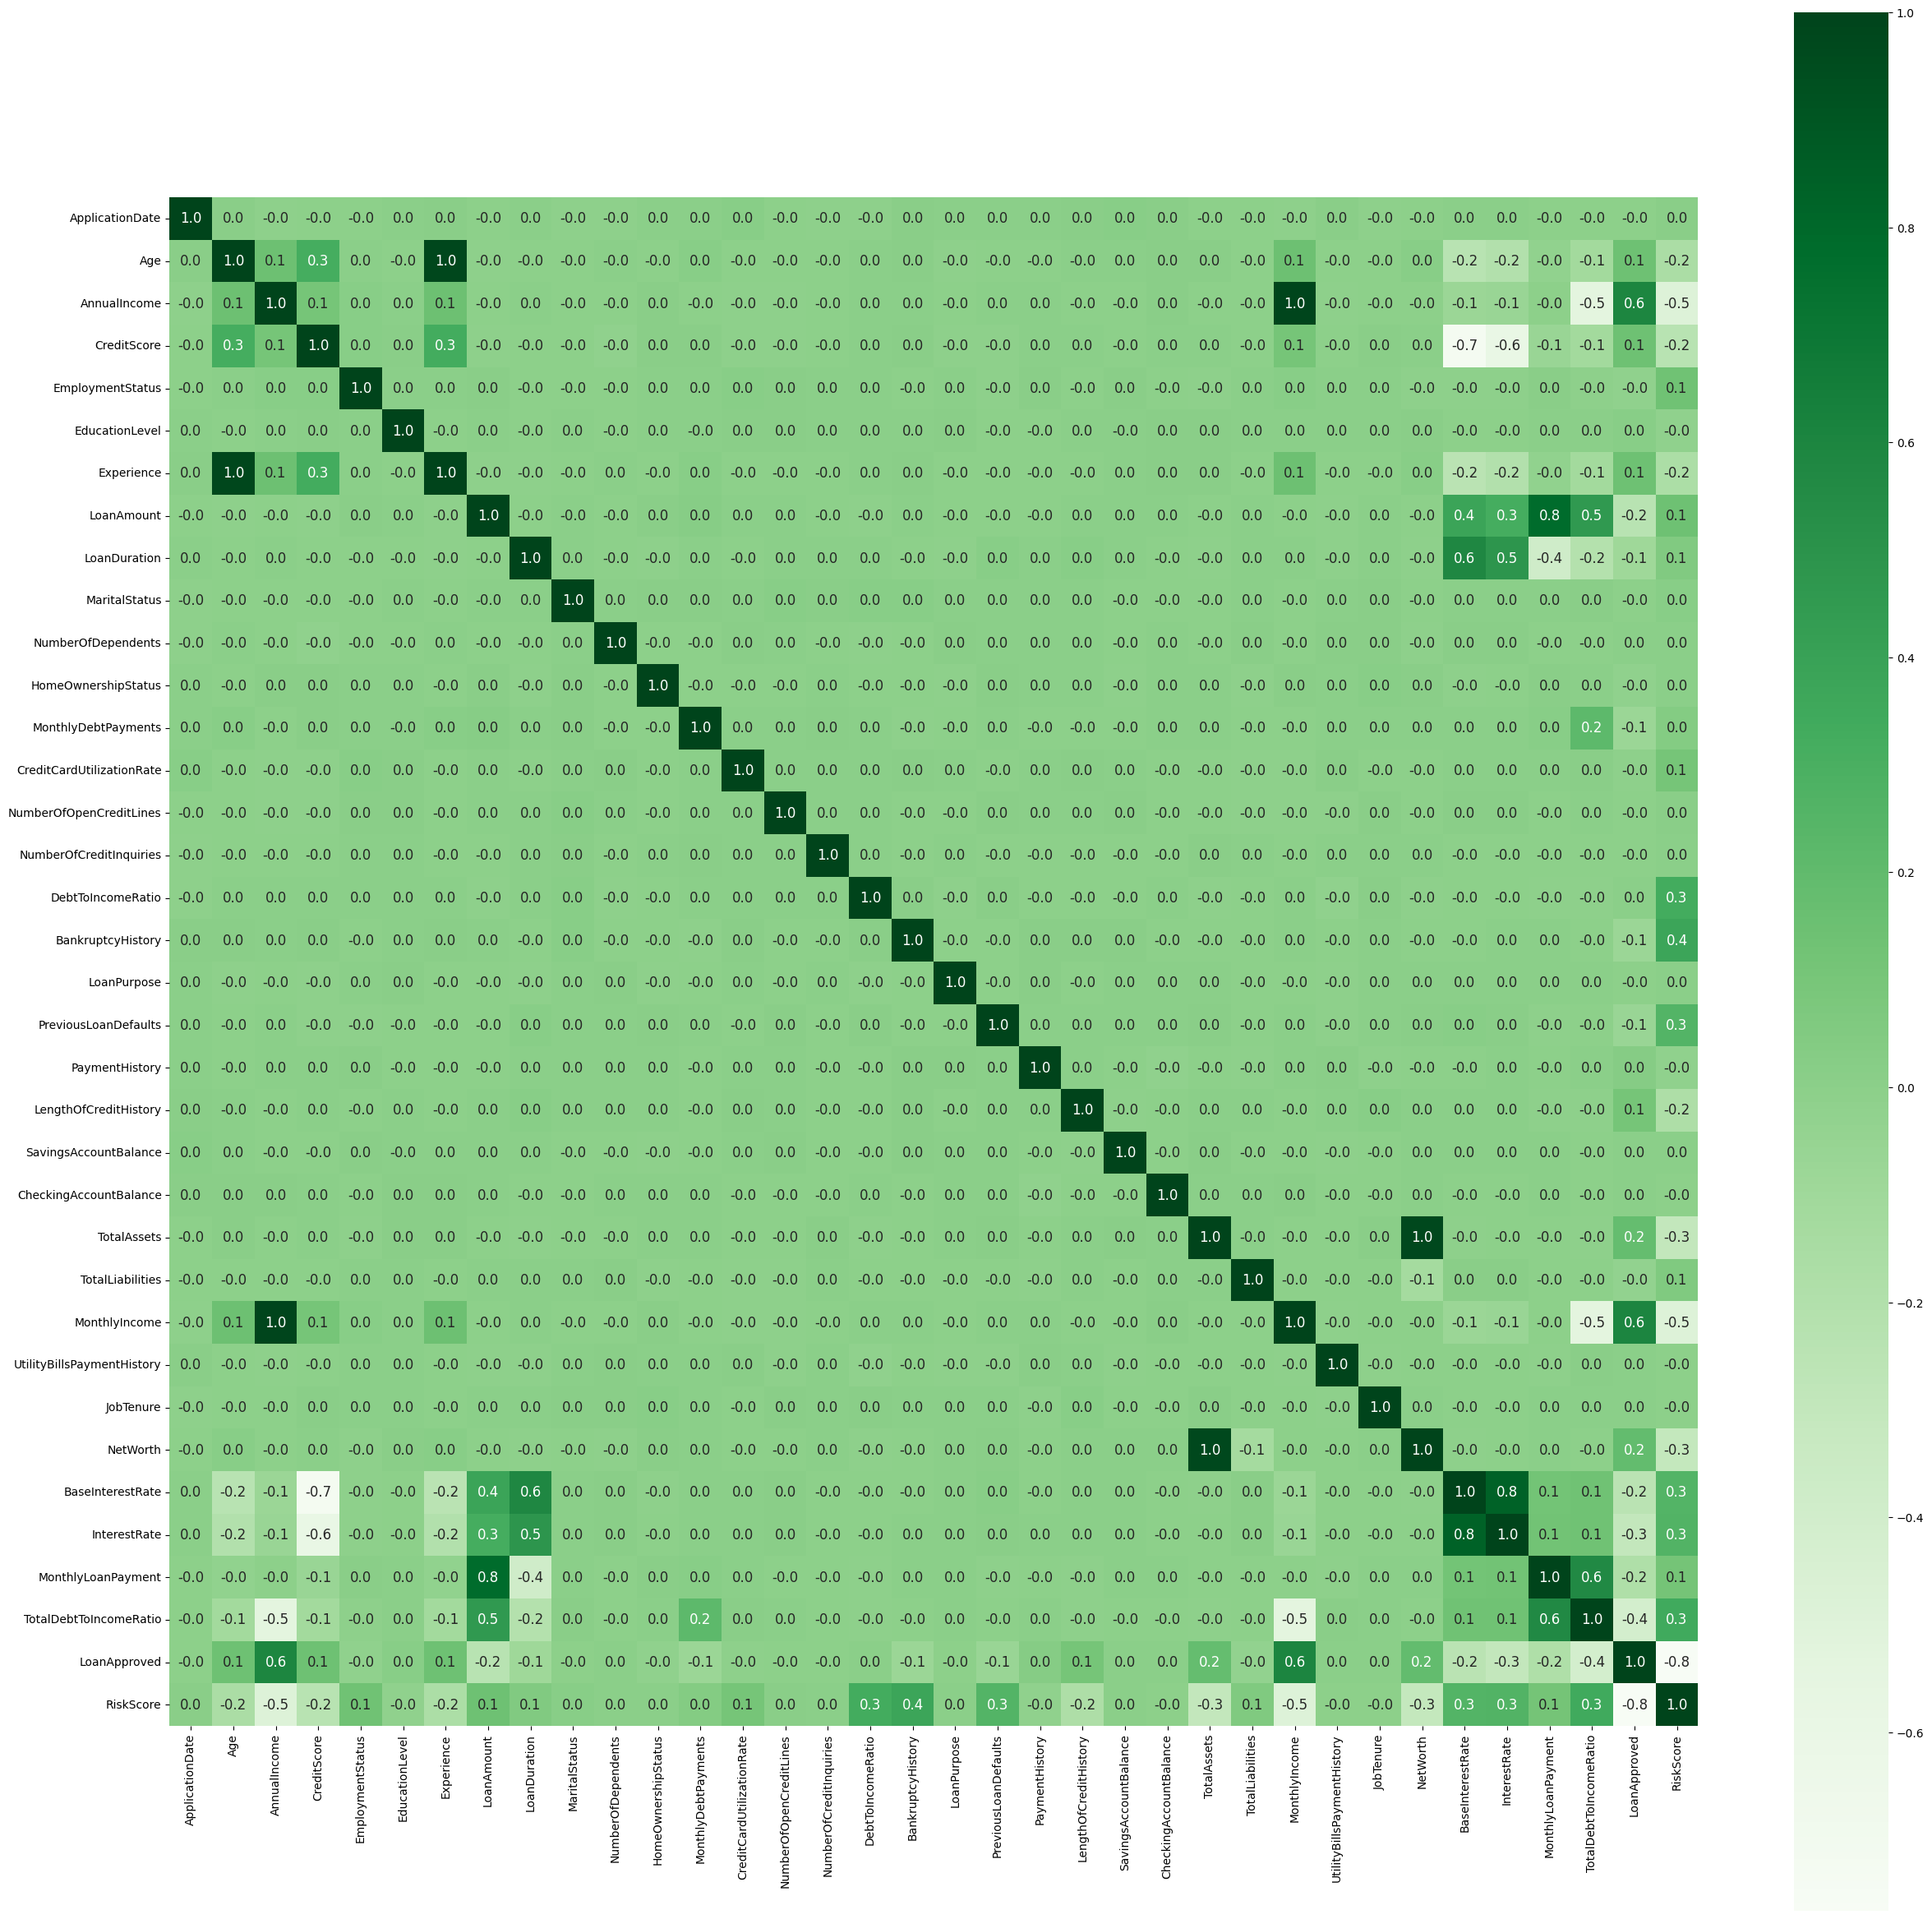

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':12}, cmap='Greens')

# Separate Features and Class

In [24]:
X = df.drop('RiskScore', axis=1)  
Y = df['RiskScore']

In [25]:
print(X)

       ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0                    0   45         39948          617                 0   
1                    1   38         39709          628                 0   
2                    2   47         40724          570                 0   
3                    3   58         69084          545                 0   
4                    4   37        103264          594                 0   
...                ...  ...           ...          ...               ...   
19995            19995   44         30180          587                 0   
19996            19996   56         49246          567                 0   
19997            19997   44         48958          645                 0   
19998            19998   60         41025          560                 0   
19999            19999   20         53227          574                 0   

       EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  \
0        

In [26]:
print(Y)

0        49.0
1        52.0
2        52.0
3        54.0
4        36.0
         ... 
19995    55.0
19996    54.0
19997    45.0
19998    59.0
19999    59.0
Name: RiskScore, Length: 20000, dtype: float64


# Standardized Features

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:1]

array([[-1.73196421,  0.45148937, -0.47617228,  0.8900213 , -0.39144747,
         1.48756916,  0.39563724, -0.87367194, -0.24557821, -0.34089823,
         0.34819548,  0.46116888, -1.12802869,  0.42579234, -1.16544516,
         1.02032522,  0.45317032, -0.2351544 ,  0.88016526, -0.33342592,
         1.01234262, -0.71163018,  0.40667082, -0.25856199,  0.40685313,
        -0.36125489, -0.47402574, -0.62112052,  2.68128067,  0.46332291,
        -1.11162261, -0.2729682 , -0.72906227, -0.65238754, -0.56041096]])

# Apply PCA

In [28]:
pca = PCA(n_components=25)  
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.1558633 , -0.90768927, -0.84108524, ...,  0.01256325,
         1.39968472,  1.45332907],
       [-0.37701124, -1.46465931, -0.83874647, ...,  0.19522744,
        -0.7710666 ,  0.15092223],
       [-0.38879379, -1.47728569, -0.83851479, ...,  1.01816477,
         0.08399678, -1.39992117],
       ...,
       [-0.15227233, -0.79241963,  0.31086636, ..., -1.01758131,
        -0.91213135,  0.18075927],
       [-0.11079177, -0.34820611, -0.62348182, ..., -0.85253363,
        -0.26178067, -1.60990196],
       [ 1.18015546,  0.30660288, -0.67846242, ..., -1.27551221,
        -0.83447809,  0.3488844 ]])

In [29]:
df.shape

(20000, 36)

# 20%80%

# Split Dataset

In [30]:

X_TRAIN , X_TEST , Y_TRAIN , Y_TEST=train_test_split(X_scaled,Y,test_size=0.2, random_state=80)
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size =
0.2, random_state=80)

In [31]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  16000
Size of Train Y =  16000
Size of Test X =  4000
Size of Test Y =  4000


In [32]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X_pca,Y, test_size =0.2, random_state=80)

# Neural Network Model

In [33]:
ma = Sequential([
    Input(shape=(X_TRAIN.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),  # First hidden layer with 64 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(16, activation='relu'),  # Third hidden layer with 16 neurons
    Dense(1, activation='linear')  # Output layer for regression
])

## Compile the model

In [34]:
ma.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Train the model

In [35]:
history = ma.fit(X_TRAIN, Y_TRAIN, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1194.1559 - mae: 28.5703 - val_loss: 55.6716 - val_mae: 5.9411
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 99.0691 - mae: 7.8888 - val_loss: 33.2152 - val_mae: 4.5416
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 74.1104 - mae: 6.8028 - val_loss: 21.4782 - val_mae: 3.6603
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58.8243 - mae: 6.0734 - val_loss: 16.6709 - val_mae: 3.2003
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50.2715 - mae: 5.6164 - val_loss: 12.6836 - val_mae: 2.8337
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 44.1455 - mae: 5.2702 - val_loss: 11.3513 - val_mae: 2.6683
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 38.5781 - mae: 4.9245 - val_loss: 10.5021 - val_mae: 2.6101
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 35.5068 - mae: 4.7137 - val_loss: 8.8671 - val_mae: 2.3922
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━

## model summary

In [36]:
ma.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,869 (50.27 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,580 (33.52 KB)

## Predictions on Training Data

In [37]:
train_predictions = ma.predict(X_TRAIN)
train_r2 = r2_score(Y_TRAIN, train_predictions)
train_mae = mean_absolute_error(Y_TRAIN, train_predictions)
                                
print(f"Training R-squared: {train_r2}")
print(f"Training Mean Absolute Error: {train_mae}")


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training R-squared: 0.8777240056864648
Training Mean Absolute Error: 2.229964144325257


## Plot Training Predictions

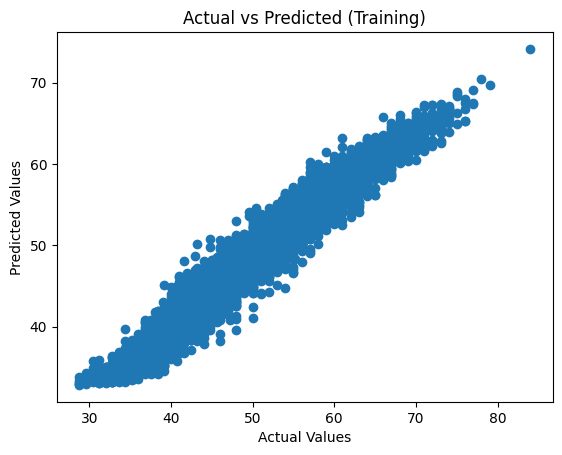

In [38]:
plt.scatter(Y_TRAIN, train_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Training)")
plt.show()


## Plot the Training and Validation Loss

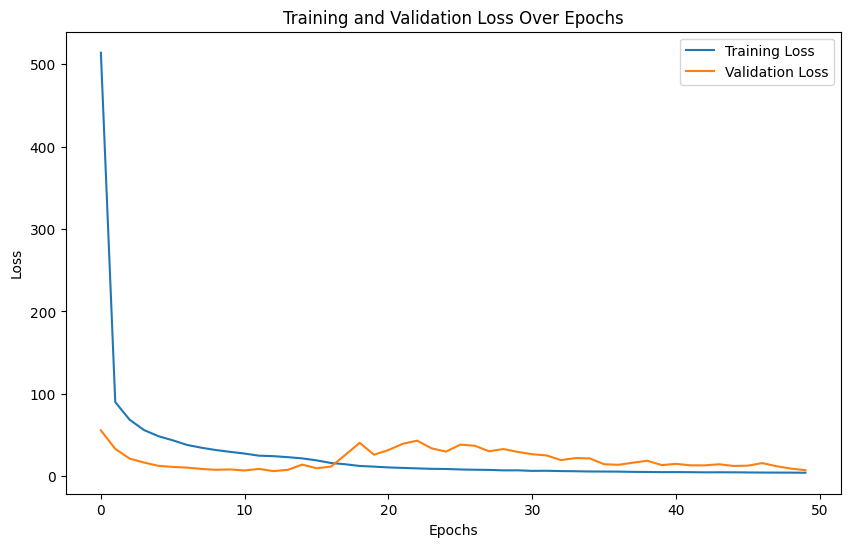

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

## Predictions on TESTING

In [40]:
test_predictions = ma.predict(X_TEST)
test_r2 = r2_score(Y_TEST, test_predictions)
test_mae = mean_absolute_error(Y_TEST, test_predictions)

print(f"Testing R-squared: {test_r2}")
print(f"Testing Mean Absolute Error: {test_mae}")



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing R-squared: 0.8686394234635808
Testing Mean Absolute Error: 2.315287644004822


## Plot Testing Predictions

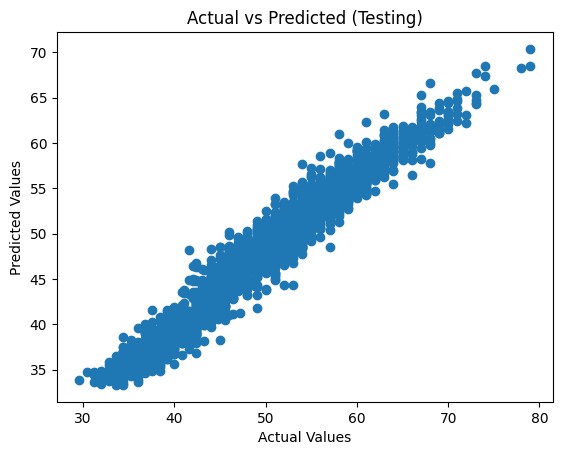

In [41]:
plt.scatter(Y_TEST, test_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Testing)")
plt.show()


# Linear Regression 

#  Perform Training on train set 

In [42]:
from sklearn.linear_model import LinearRegression
df = LinearRegression()
df.fit (X_TRAIN, Y_TRAIN)
LinearRegression()

LinearRegression()

In [43]:
# accuracy for prediction on training data 
training_data_prediction = df.predict(X_TRAIN)
print(training_data_prediction) 

[56.79309943 48.39881246 54.50617824 ... 54.40688027 55.83752632
 57.53591075]


#  Find Training Accuracy with r2_score and find loss with Mean Absolute Error 

In [44]:
# R squared error 
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction) 

In [45]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction) 

In [46]:
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2) 

R squared :  0.8741147249049636
Mean Absolute Error :  2.1636008467839987


# Draw Graph for graphical representation between predicted train and actual labels 

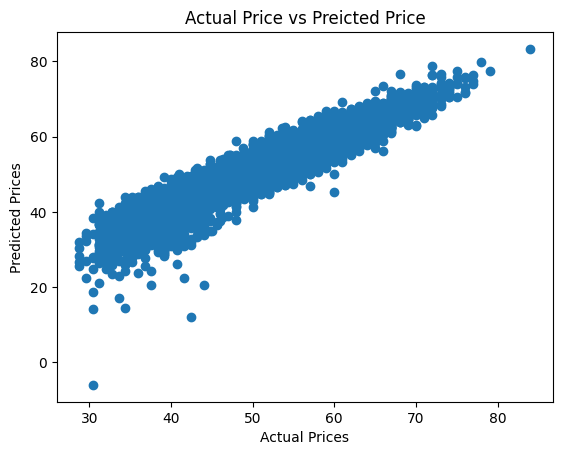

In [47]:
plt.scatter(Y_TRAIN, training_data_prediction) 
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted Prices") 
plt.title("Actual Price vs Preicted Price") 
plt.show()

# Perform Testing on Test set 

In [48]:
y_pred = df.predict(X_TEST) 
y_pred 
print(y_pred)

[56.93127763 60.2252372  43.11181517 ... 54.97154509 50.69557472
 54.46278615]


#  Find Testing Accuracy with r2_score and find loss with Mean Absolute Error 

In [49]:
# R squared Score 
score_1 = metrics.r2_score(Y_TEST, y_pred) 

In [50]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred) 

In [51]:
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2) 

R squared Score :  0.8755457724353257
Mean Absolute Error :  2.1469731503871112


# Draw Graph for graphical representation between predicted Test and actual labels 

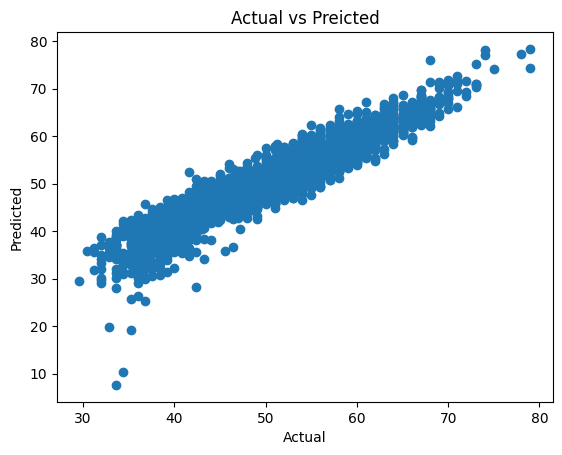

In [52]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# SVM

#  Perform Training on train set 

In [53]:
from sklearn.svm import SVR 
df= SVR(kernel='linear')
df.fit(X_TRAIN, Y_TRAIN) 
SVR(kernel='linear')

SVR(kernel='linear')

In [54]:
# accuracy for prediction on training data 
training_data_prediction = df.predict(X_TRAIN)
print(training_data_prediction)

[56.66201728 47.72496355 54.73299428 ... 54.49062293 56.33641743
 57.68348238]


#  Find Testing Accuracy with r2_score and find loss with Mean Absolute Error 

In [55]:
# R squared score 
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction) 

In [56]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction) 

In [57]:
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2) 

R squared score :  0.8697235905218954
Mean Absolute Error :  2.137634030065089


#  Draw Graph for graphical representation between predicted train and actual labels 

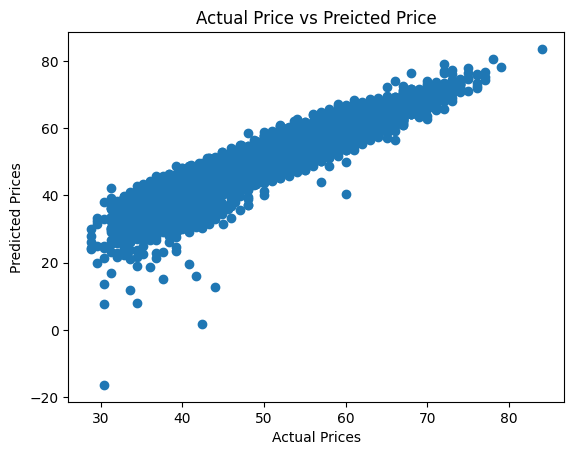

In [58]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices") 
plt.title("Actual Price vs Preicted Price")
plt.show()

# Perform Testing on Test set 

In [59]:
y_pred = df.predict(X_TEST) 
y_pred
print(y_pred) 

[57.00093005 60.31539983 43.14482614 ... 55.31363618 50.98153021
 54.68168459]


#  Find Testing Accuracy with r2_score and find loss with Mean Absolute Error 

In [60]:
# R squared score 
score_1 = metrics.r2_score(Y_TEST, y_pred) 

In [61]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred) 

In [62]:
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2) 

R squared Score :  0.8696871397201924
Mean Absolute Error :  2.12772934337664


#  Draw Graph for graphical representation between predicted Test and actual labels 


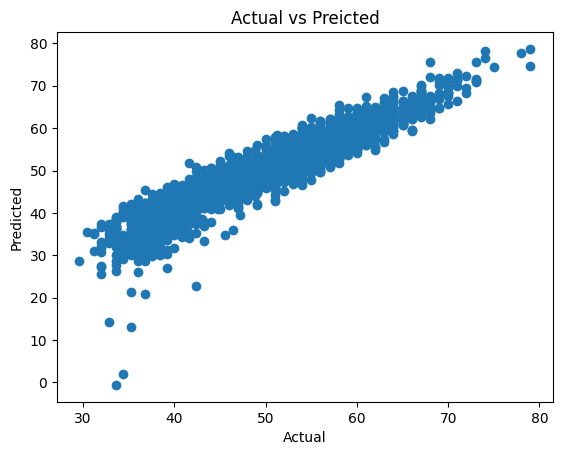

In [63]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted") 
plt.show()

#  Decision Tree 

#  Perform Training on train set 

In [64]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
df= DecisionTreeRegressor(random_state = 80)  
# fit the regressor with X and Y data
df.fit(X_TRAIN, Y_TRAIN)
DecisionTreeRegressor(random_state=80)


DecisionTreeRegressor(random_state=80)

In [65]:
# accuracy for prediction on training data
training_data_prediction = df.predict(X_TRAIN)
print(training_data_prediction) 

[54. 45. 57. ... 52. 55. 56.]


#  Find Training Accuracy with r2_score and find loss with Mean Absolute Error 

In [66]:
# R squared score
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)

In [67]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)

In [68]:
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2) 

R squared score :  1.0
Mean Absolute Error :  2.0872192862952943e-17


#  Draw Graph for graphical representation between predicted train and actual labels 


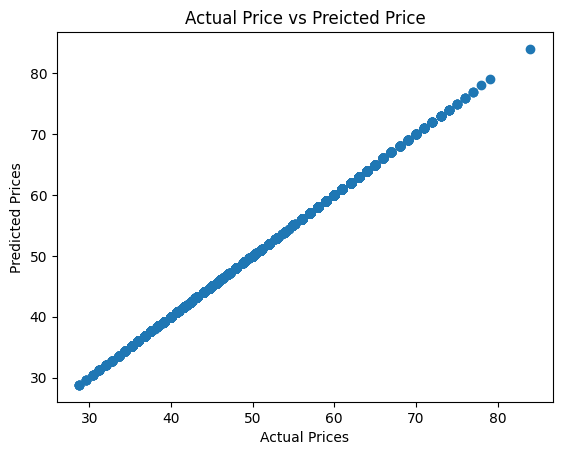

In [69]:
plt.scatter(Y_TRAIN, training_data_prediction) 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices") 
plt.title("Actual Price vs Preicted Price")
plt.show()

# Perform Testing on Test set 

In [70]:
y_pred = df.predict(X_TEST) 
y_pred 

array([48. , 56. , 44.8, ..., 59. , 54. , 53. ])

#  Find Training Accuracy with r2_score and find loss with Mean Absolute Error 

In [71]:
# R squared score 
score_1 = metrics.r2_score(Y_TEST, y_pred) 

In [72]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred) 

In [73]:
print("R squared score : ", score_1) 
print('Mean Absolute Error : ', score_2) 

R squared score :  0.6032949613958967
Mean Absolute Error :  3.65735


#  Draw Graph for graphical representation between predicted train and actual labels 

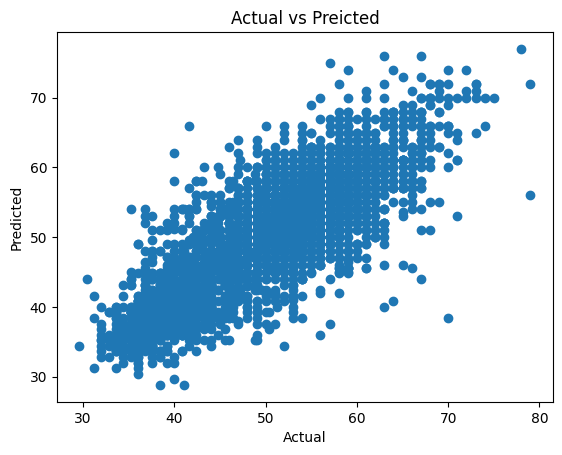

In [74]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted") 
plt.show()

#  Random Forest 

In [75]:
from sklearn.ensemble import RandomForestRegressor 
df = RandomForestRegressor(n_estimators=5, random_state=80)
# fit the regressor with X and Y data 
df.fit(X_TRAIN, Y_TRAIN)
RandomForestRegressor(n_estimators=5, random_state=80)


RandomForestRegressor(n_estimators=5, random_state=80)

#  Perform Training on Test set 

In [76]:
# accuracy for prediction on training data
training_data_prediction = df.predict(X_TRAIN) 
print(training_data_prediction)

[53.2 45.  57.8 ... 51.2 53.  55.6]


 # Find Training Accuracy with r2_score and find loss with Mean Absolute Error 

In [77]:
# R squared error 
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction) 

In [78]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction) 

In [79]:
print("R squared error : ", score_1) 
print('Mean Absolute Error : ', score_2) 

R squared error :  0.9505552748240629
Mean Absolute Error :  1.1640625000000002


#  Draw Graph for graphical representation between predicted train and actual labels 

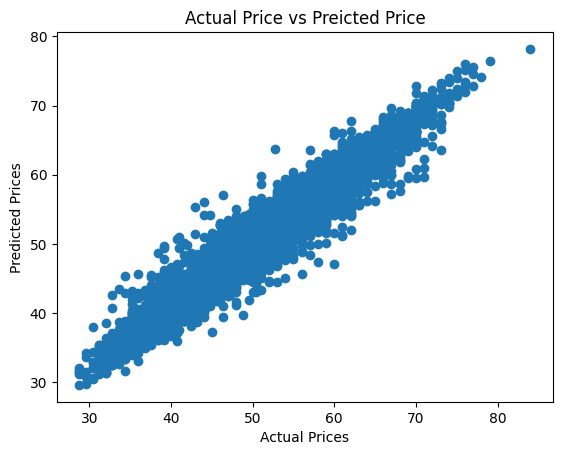

In [80]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price") 
plt.show()

# Perform Testing on Test set 

In [81]:
y_pred = df.predict(X_TEST)
y_pred 

array([45.56, 53.2 , 41.44, ..., 53.12, 52.4 , 54.  ])

#  Find Testing Accuracy with r2_score and find loss with Mean Absolute Error 

In [82]:
# R squared Score 
score_1 = metrics.r2_score(Y_TEST, y_pred) 

In [83]:
# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred) 

In [84]:
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2) 

R squared Score :  0.797884619022068
Mean Absolute Error :  2.64827


#  Draw Graph for graphical representation between predicted train and actual labels 

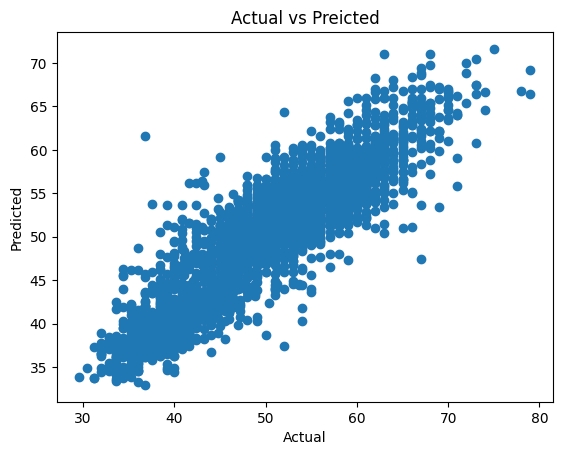

In [85]:
plt.scatter(Y_TEST, y_pred) 
plt.xlabel("Actual") 
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# Draw tree

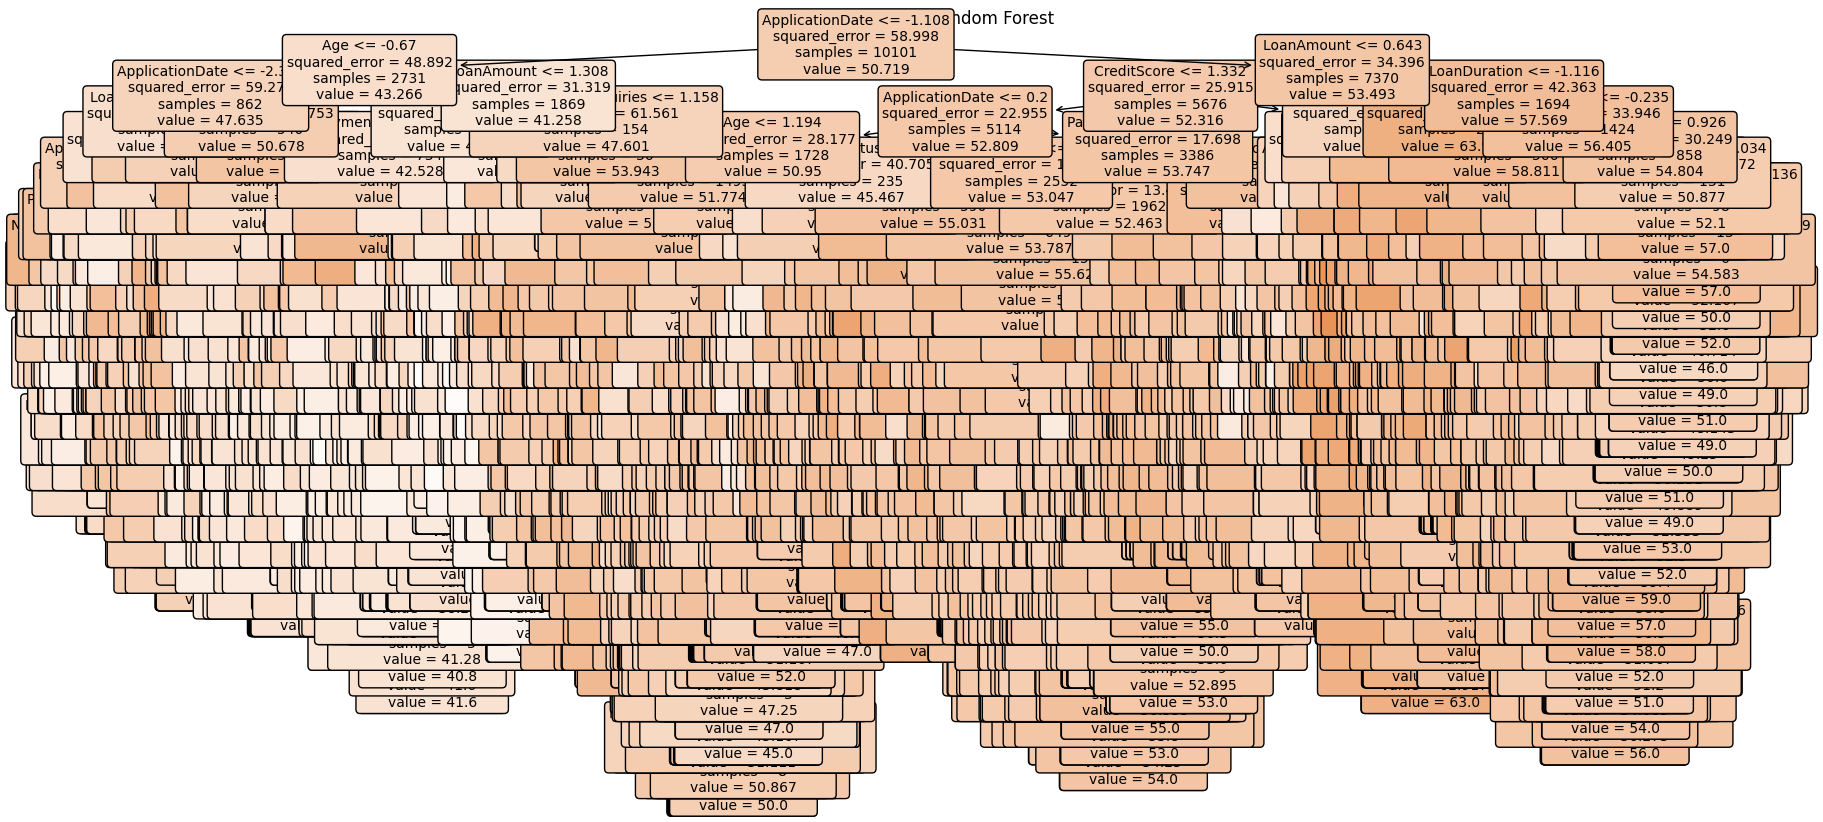

In [87]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming 'regressor' is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = df.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


## Conclusion:
## Best Model: Linear Regression
## Balanced Performance: The SVM shows a balanced performance
## Overfitting: Decision Tree is overfitting badly
## overfitting: The Random Forest shows some overfitting but better than Decision Tree